# CSS 330 Data wrangling and visualization | FINAL Project

### I'm going to handle Home Credit Default Risk dataset from kaggle: https://www.kaggle.com/c/home-credit-default-risk/overview
### Initial aim of the project: To show the data wrangling, manipulation and visualization skills earned from class. 
### Idea: Do an EDA (Exploratory Data Analysis)

## People need the loan, they get permission to get loans from trustable sources such as Bank. In this case, Home Credit. They provide the data set of loan applicants with their informations about what type of document they have, about their properties, or even families. There are 307511 number of observations with 122 features. We need the programming tools to visualize and manipulate with such big data, so we use here Python with libraries pandas, numpy, matplotlib and seaborn to do all that things.

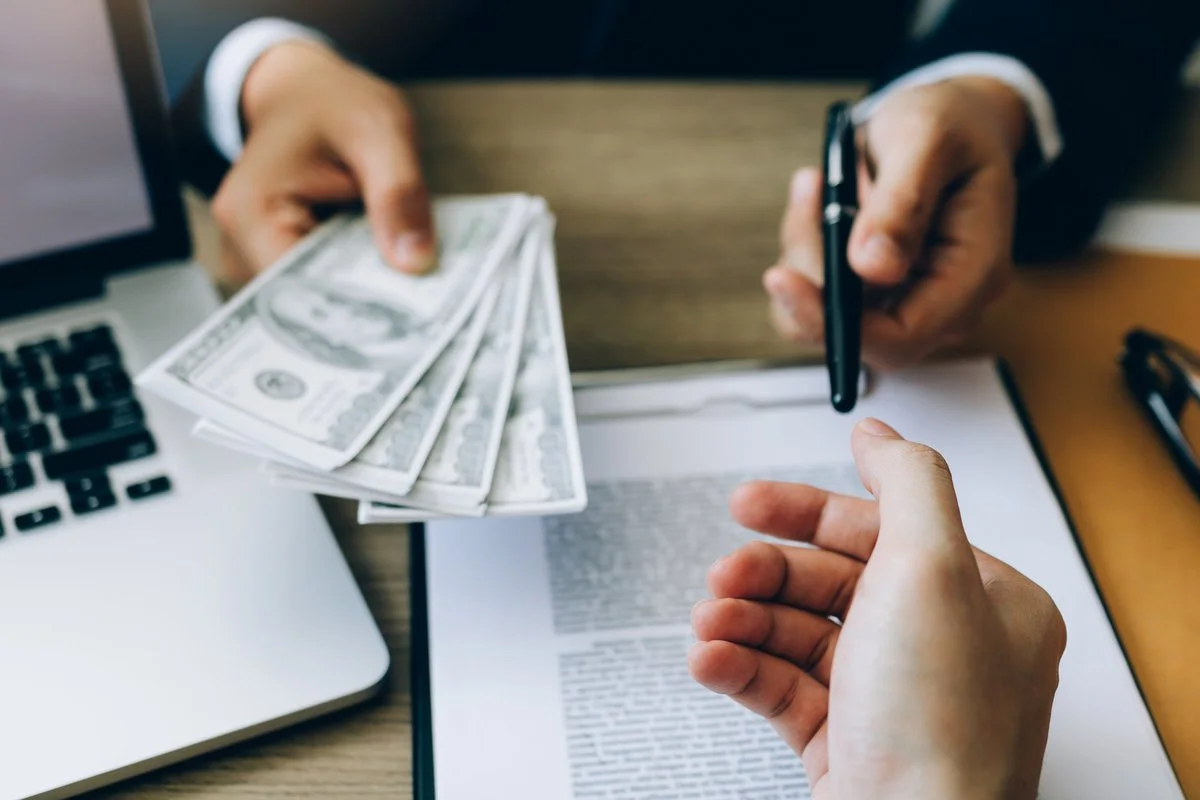

In [521]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [522]:
from scipy.stats import norm

In [589]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
plt.style.use('ggplot')

In [3]:
application_train = pd.read_csv('D:/SDU/Python/Data Science/HomeCredit Competition/home-credit-default-risk/application_train.csv')

## Data of applications with target value of loan repayment look like the following:

In [4]:
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Columns:

In [269]:
for i in application_train.columns:
    print(i)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

Loan Repayment:
0    282686
1     24825
Name: TARGET, dtype: int64

Loan repayment by percentage:
0    0.919271
1    0.080729
Name: TARGET, dtype: float64


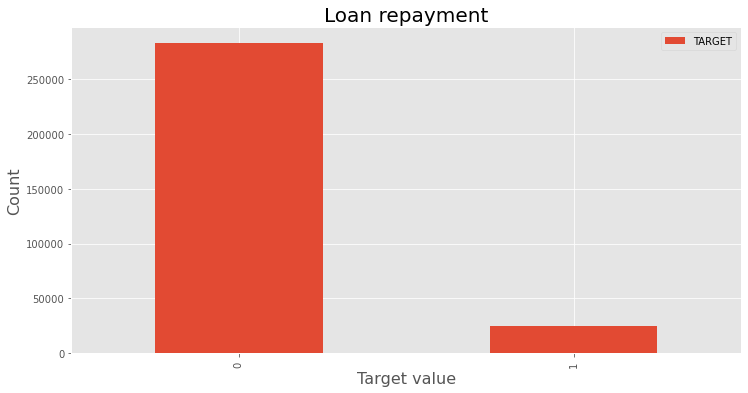

In [548]:
print('Loan Repayment:')
print(application_train['TARGET'].value_counts())
print('\nLoan repayment by percentage:')
print(application_train['TARGET'].value_counts(normalize = True))

plt.figure(figsize = (12, 6))

application_train['TARGET'].value_counts().plot(kind = 'bar')

plt.title('Loan repayment', fontdict = {'fontsize': 20})
plt.xlabel('Target value', fontdict = {'fontsize': 16})
plt.ylabel('Count', fontdict = {'fontsize': 16})
plt.legend();

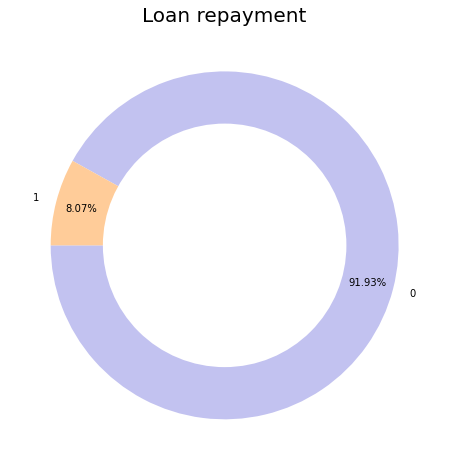

In [547]:
vals = application_train['TARGET'].value_counts().values
inds = application_train['TARGET'].value_counts().index

plt.figure(figsize = (16, 8))
plt.pie(x=vals, autopct="%.2f%%", labels = inds, colors = ['#c2c2f0','#ffcc99'], pctdistance = 0.85, startangle = 180)
plt.title('Loan repayment', fontdict = {'fontsize': 20})

centre_circle = plt.Circle((0,0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

## We see high imbalance of target value, where 91.93% of loans were repayed, whenever 8.07% not.

CODE_GENDER  TARGET
F            0         188278
             1          14170
M            0          94404
             1          10655
XNA          0              4
Name: TARGET, dtype: int64


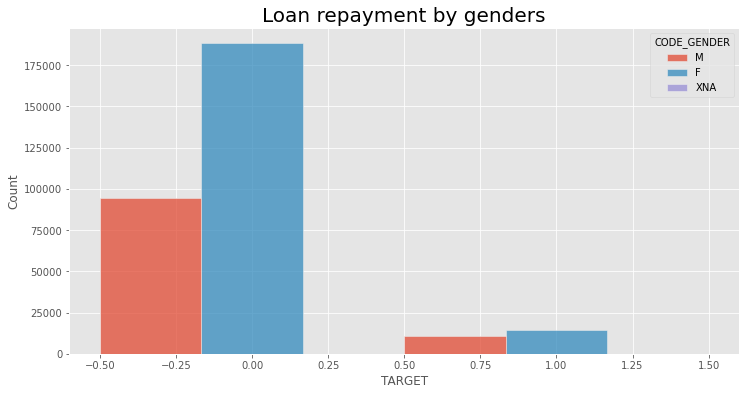

In [546]:
print(application_train.groupby('CODE_GENDER')['TARGET'].value_counts())

plt.figure(figsize = (12, 6))
plt.title('Loan repayment by genders', fontdict = {'fontsize': 20})
sns.histplot(data = application_train, x = 'TARGET', hue = 'CODE_GENDER', multiple = 'dodge', discrete = True)
plt.show()

## By looking at the graph it seems that females repay loan as twice as men. Let's test this hypothesis

In [110]:
print('Genders:')
print(application_train['CODE_GENDER'].value_counts())

print('\nGenders by percentage:')
print(application_train['CODE_GENDER'].value_counts(normalize = True))

Genders:
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Genders by percentage:
F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64


## Now, we can easily see that females repay loan as twice as men, because females are twice more than men

FLAG_OWN_CAR  TARGET
N             0         185675
              1          17249
Y             0          97011
              1           7576
Name: TARGET, dtype: int64


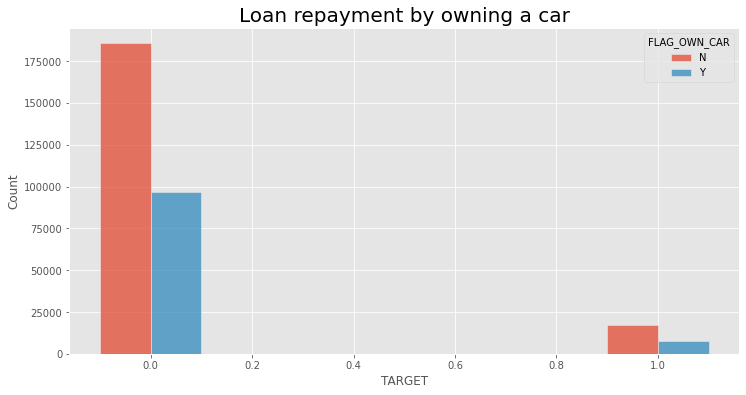

In [545]:
print(application_train.groupby('FLAG_OWN_CAR')['TARGET'].value_counts())

plt.figure(figsize = (12, 6))

plt.title('Loan repayment by owning a car', fontdict = {'fontsize': 20})
sns.histplot(data = application_train, x = 'TARGET', hue = 'FLAG_OWN_CAR', multiple = 'dodge', discrete = True, shrink=0.2)
plt.show()

In [121]:
print('Does the person have a car:')
print(application_train['FLAG_OWN_CAR'].value_counts())

print('\nDoes the person have a car by percentage:')
print(application_train['FLAG_OWN_CAR'].value_counts(normalize = True))

Does the person have a car:
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Does the person have a car by percentage:
N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64


FLAG_OWN_REALTY  TARGET
N                0          86357
                 1           7842
Y                0         196329
                 1          16983
Name: TARGET, dtype: int64


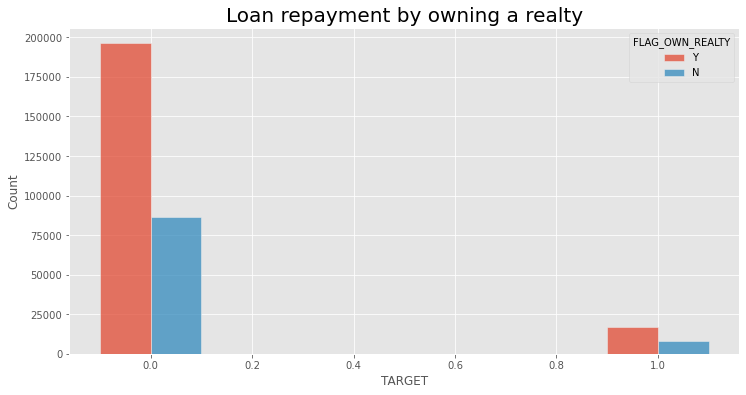

In [544]:
print(application_train.groupby('FLAG_OWN_REALTY')['TARGET'].value_counts())

plt.figure(figsize = (12, 6))
plt.title('Loan repayment by owning a realty', fontdict = {'fontsize': 20})
sns.histplot(data = application_train, x = 'TARGET', hue = 'FLAG_OWN_REALTY', multiple = 'dodge', discrete = True, shrink=0.2)
plt.show()

In [122]:
application_train['FLAG_OWN_REALTY'].value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

## Same thing happens with the features owning a car and realty

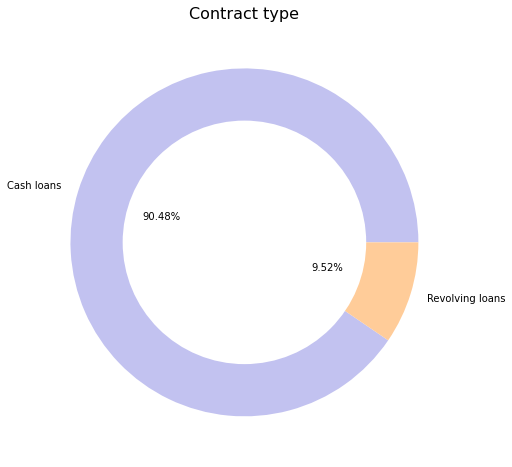

In [261]:
vals = application_train['NAME_CONTRACT_TYPE'].value_counts().values
inds = application_train['NAME_CONTRACT_TYPE'].value_counts().index

plt.figure(figsize = (16, 8))
plt.pie(x=vals, autopct="%.2f%%", labels = inds, colors = ['#c2c2f0','#ffcc99'], pctdistance = 0.5)
plt.title('Contract type', fontdict = {'fontsize': 16})

centre_circle = plt.Circle((0,0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

## The most of the loans are cash loans with 90% frequency, while other 10% are revolving loans

## Here are the AMT (Alternative Minimum Tax) Credit, Total Income, Annuity and Goods Price distribution plots

In [598]:
def dist_plot(col, title):
    plt.figure(figsize = (16, 8))
    plt.title(title, fontdict = {'fontsize': 20})
    sns.distplot(application_train[col])
    plt.show()

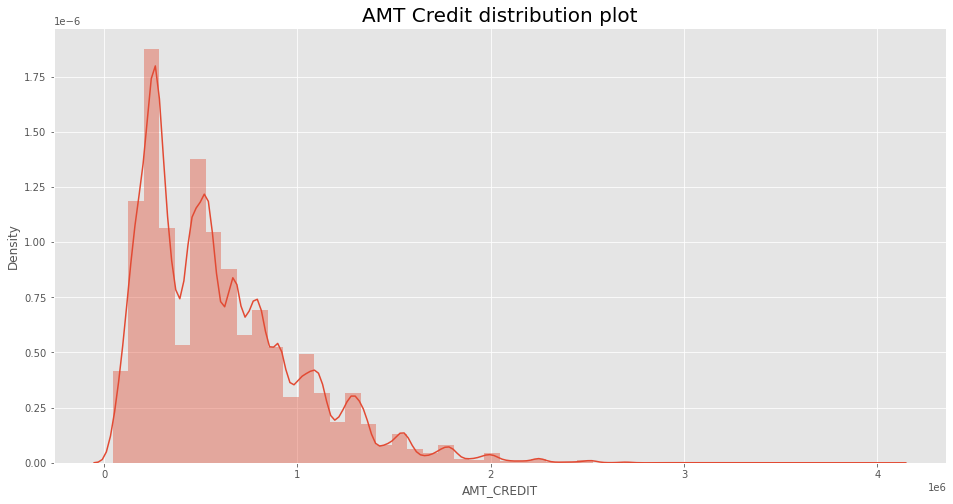

In [599]:
dist_plot('AMT_CREDIT', 'AMT Credit distribution plot')

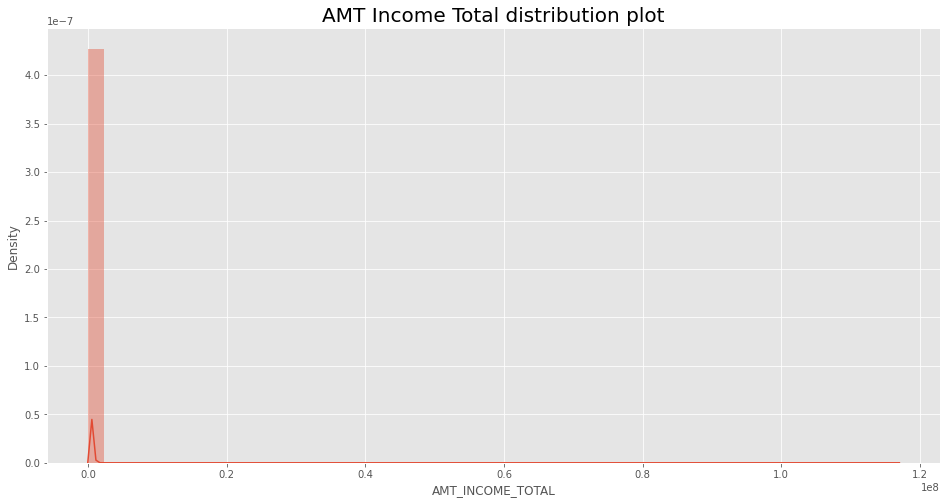

In [600]:
dist_plot('AMT_INCOME_TOTAL', 'AMT Income Total distribution plot')

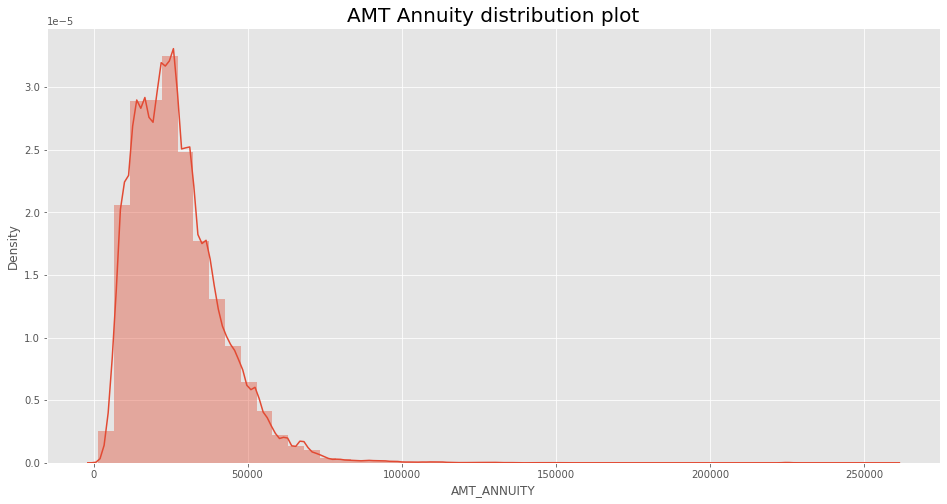

In [601]:
dist_plot('AMT_ANNUITY', 'AMT Annuity distribution plot')

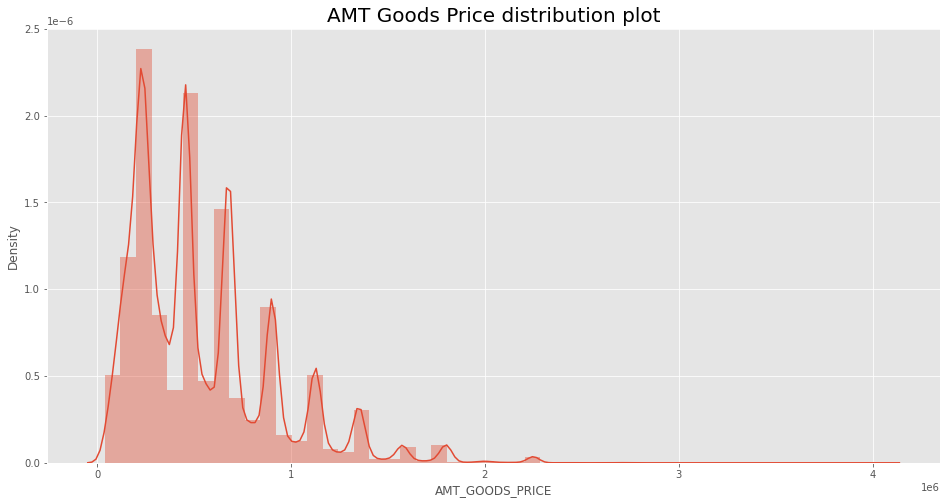

In [602]:
dist_plot('AMT_GOODS_PRICE', 'AMT Goods Price distribution plot')

## Now let's look at income types, to answer the question from where do the applications get money

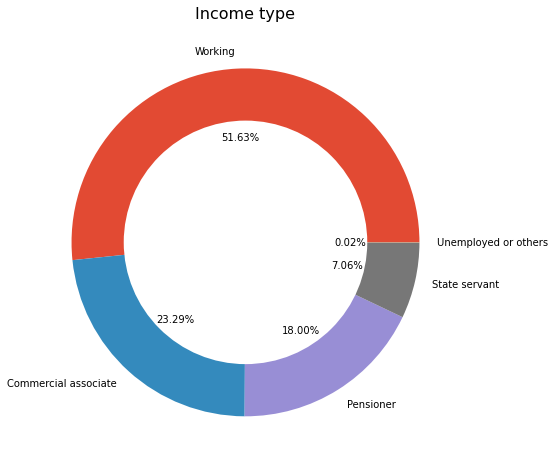

In [344]:
vals = application_train['NAME_INCOME_TYPE'].value_counts().values
inds = application_train['NAME_INCOME_TYPE'].value_counts().index

other_vals = vals[4:].sum()
vals = vals[:4]
inds = inds[:4]
other_inds = pd.Index(['Unemployed or others'])

vals = np.append(vals, other_vals)
inds = inds.append(other_inds)

plt.figure(figsize = (16, 8))
plt.pie(vals, autopct="%.2f%%", labels = inds)
plt.title('Income type', fontdict = {'fontsize': 16})

centre_circle = plt.Circle((0,0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

## There are 0.02% of unemployed, students and other people's income type

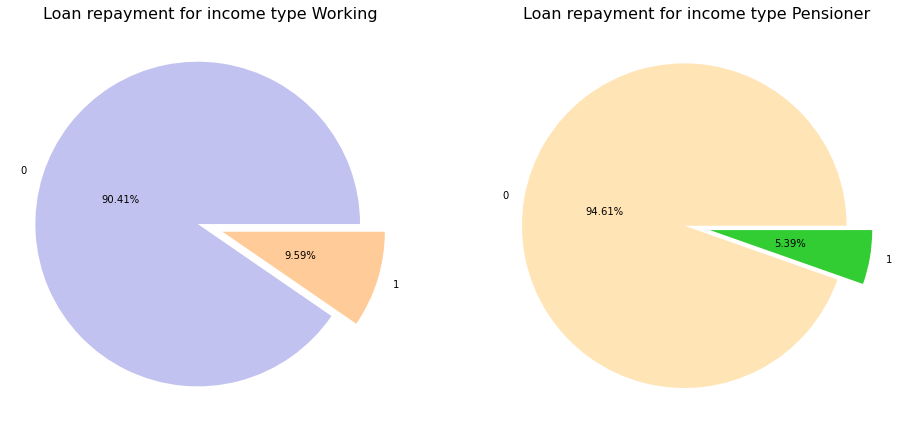

In [434]:
vals = application_train.query("NAME_INCOME_TYPE == 'Working'").TARGET.value_counts(normalize = True).values
inds = application_train.query("NAME_INCOME_TYPE == 'Working'").TARGET.value_counts(normalize = True).index

fig, axes = plt.subplots(1, 2, figsize = (16, 8))

axes[0].pie(x = vals, autopct="%.2f%%", labels = inds, colors = ['#c2c2f0','#ffcc99'], pctdistance = 0.5, 
           explode = (0.08, 0.08))
axes[0].set_title('Loan repayment for income type Working', fontdict = {'fontsize': 16})

vals = application_train.query("NAME_INCOME_TYPE == 'Pensioner'").TARGET.value_counts(normalize = True).values
inds = application_train.query("NAME_INCOME_TYPE == 'Pensioner'").TARGET.value_counts(normalize = True).index

axes[1].pie(x=vals, autopct="%.2f%%", labels = inds, colors = ['moccasin','limegreen'], pctdistance = 0.5,
           explode = (0.08, 0.08))
axes[1].set_title('Loan repayment for income type Pensioner', fontdict = {'fontsize': 16})
plt.show()

## By pie charts we can see that pensioners tend to repay more than working people. Is it really like that? Let's do the hypothesis testing

## $\large \\* \left \{ H_0: p_y<=p_x \right. \\* \left \{ H_1: p_y>p_x \right.$ 

## Where $p_x$ is proportion for workers 90.41%, $p_y$ for pensioners 94.61%

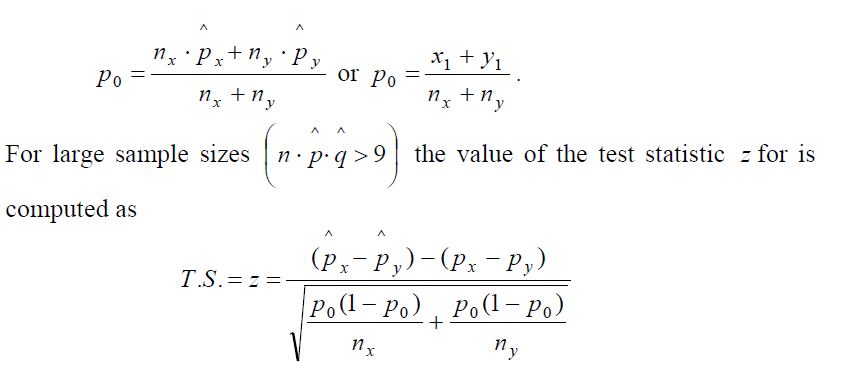

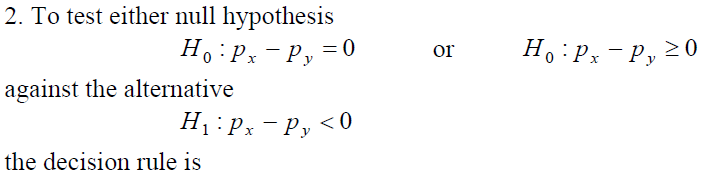

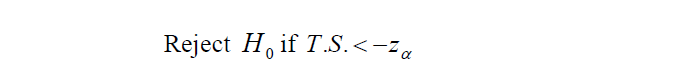

## References to the book STATISTICS by Humbat Nabi oglu Aliyev

## Take $\alpha=0.01$ that is our significance level

In [527]:
x = application_train.query("NAME_INCOME_TYPE == 'Working'").TARGET
n_x = len(x)
p_x = x.value_counts()[0] / n_x
q_x = x.value_counts()[1] / n_x

y = application_train.query("NAME_INCOME_TYPE == 'Pensioner'").TARGET
n_y = len(y)
p_y = y.value_counts()[0] / n_y
q_y = y.value_counts()[1] / n_y
print('Sample size npq for x:', n_x*p_x*q_x)
print('Sample size npq for y:', n_y*p_y*q_y)

p_0 = (n_x * p_x + n_y * p_y) / (n_x + n_y)
p_0_var = p_0 * (1 - p_0)

test_statistic = (p_x - p_y) / np.sqrt(p_0_var/n_x + p_0_var/n_y)
z_001 = norm.ppf(0.01)
print('Reject H_0 if T.S. < -z_alpha. Do we reject our null hypothesis? :', test_statistic < z_001)

Sample size npq for x: 13764.251073853402
Sample size npq for y: 2821.37856291319
Reject H_0 if T.S. < -z_alpha. Do we reject our null hypothesis? : True


## By hypothesis testing, it turns out that pensioners indeed tend to repay loans more than working people.

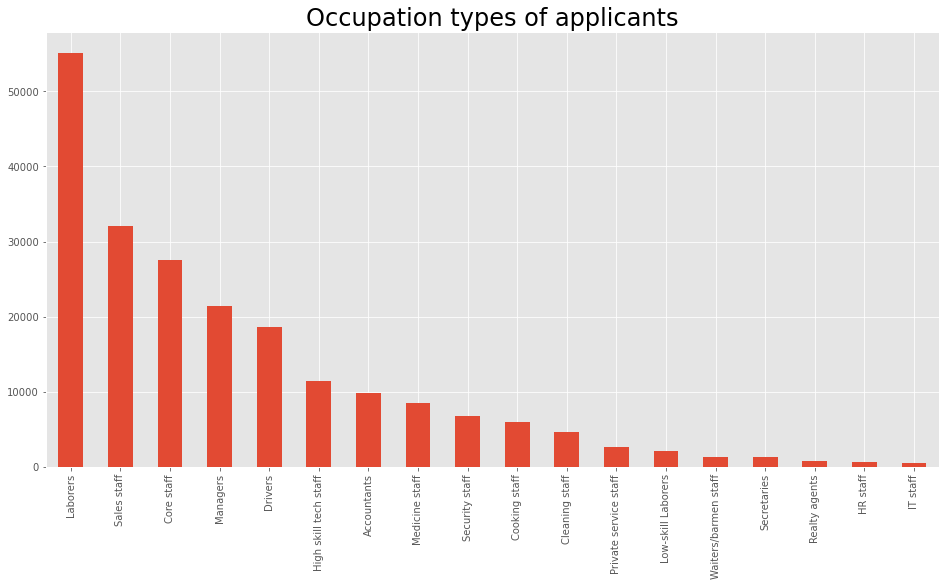

In [542]:
plt.figure(figsize = (16, 8))
application_train['OCCUPATION_TYPE'].value_counts().plot(kind = 'bar')
plt.title('Occupation types of applicants', fontdict = {'fontsize': 24})
plt.show()

## The most of the occupation types are laborers, sales and core staff

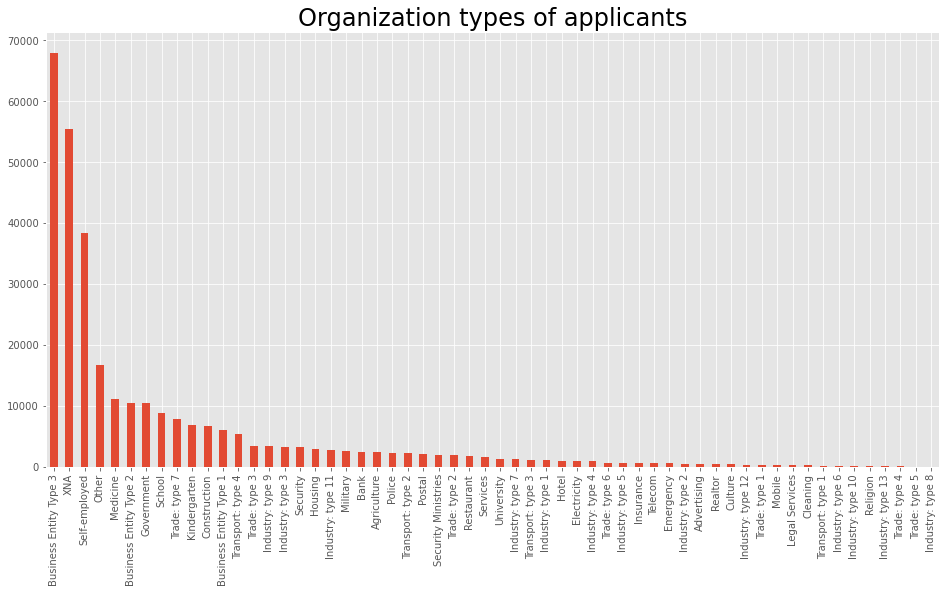

In [605]:
plt.figure(figsize = (16, 8))
application_train['ORGANIZATION_TYPE'].value_counts().plot(kind = 'bar')
plt.title('Organization types of applicants', fontdict = {'fontsize': 24})
plt.show()

## The most frequent organization types are business entity and self-employed

# Conclusion: 
## I did Exploratory Data Analysis, by manipulating the loan applicants data and visualized important numbers, categorical values to more understandable graphs such as distribution plot, bar plot, histogram plot, pie plot that are easier to see and compare. I also did an assumption of some hypothesis and then tested it